# Composition of Matrix Transformations — Educational Notebook

In this notebook, we explore the fundamental concept of **combining multiple matrix transformations** and why order matters.

## 🎯 Learning Objectives
- Understand how matrix multiplication represents sequential transformations
- Visualize the geometric meaning of transformation composition
- Discover why matrix multiplication is non-commutative (order matters)
- Learn the associative property of matrix multiplication
- Connect these concepts to real-world applications

## 🔑 Key Concepts
1. **Composition**: Applying transformations in sequence
2. **Order dependence**: $A_2 A_1 \neq A_1 A_2$ (generally)
3. **Right-to-left reading**: $A_2 A_1$ means "apply $A_1$ first, then $A_2$"
4. **Geometric interpretation**: Each step transforms the result of the previous step

**Why This Matters**: Understanding composition is critical for computer graphics (3D rotations), robotics (joint movements), neural networks (layer composition), and solving systems of equations.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_composition(A1, A2, title, show_intermediate=True):
    """
    Visualize the composition of two matrix transformations.
    
    Parameters:
    A1: First transformation matrix (applied first)
    A2: Second transformation matrix (applied second)
    title: Plot title
    show_intermediate: Whether to show intermediate steps
    """
    # Define a unit square for visualization
    square = np.array([[0, 1, 1, 0, 0], 
                       [0, 0, 1, 1, 0]])
    
    # Apply transformations step by step
    A1_square = A1 @ square          # First transformation
    A2A1_square = A2 @ A1_square     # Second transformation applied to result
    
    # For comparison: apply A2 alone to original
    A2_square = A2 @ square
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot original square
    ax.plot(square[0], square[1], 'k--', linewidth=2, alpha=0.7, 
            label='Original Square')
    
    if show_intermediate:
        # Plot intermediate step (A1 applied)
        ax.plot(A1_square[0], A1_square[1], 'b-', linewidth=2, 
                label='After A₁ (Step 1)')
        
        # Plot A2 applied to original (for comparison)
        ax.plot(A2_square[0], A2_square[1], 'g-', linewidth=2, alpha=0.7,
                label='A₂ applied to original')
    
    # Plot final result (A2 @ A1)
    ax.plot(A2A1_square[0], A2A1_square[1], 'r-', linewidth=3, 
            label='Final: A₂ @ A₁ (Step 2)')
    
    # Add annotations showing the transformation sequence
    ax.annotate('Start', xy=(0.5, 0.5), xytext=(0.5, -0.8),
                ha='center', fontsize=12, fontweight='bold',
                arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    
    if show_intermediate:
        # Show the sequence with arrows
        mid_x, mid_y = np.mean(A1_square, axis=1)
        final_x, final_y = np.mean(A2A1_square, axis=1)
        
        ax.annotate('A₁', xy=(mid_x, mid_y), xytext=(mid_x-1, mid_y-1),
                    ha='center', fontsize=12, fontweight='bold', color='blue',
                    arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
        
        ax.annotate('A₂', xy=(final_x, final_y), xytext=(final_x+1, final_y+1),
                    ha='center', fontsize=12, fontweight='bold', color='red',
                    arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    
    # Formatting
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Set appropriate axis limits
    all_points = np.hstack([square, A1_square, A2A1_square, A2_square])
    margin = 0.5
    ax.set_xlim(all_points[0].min() - margin, all_points[0].max() + margin)
    ax.set_ylim(all_points[1].min() - margin, all_points[1].max() + margin)
    
    plt.tight_layout()
    plt.show()
    
    # Print numerical information
    print(f"A₁ (applied first) = \n{A1}")
    print(f"A₂ (applied second) = \n{A2}")
    print(f"Composition A₂ @ A₁ = \n{A2 @ A1}")
    print(f"det(A₁) = {np.linalg.det(A1):.3f}")
    print(f"det(A₂) = {np.linalg.det(A2):.3f}")
    print(f"det(A₂ @ A₁) = {np.linalg.det(A2 @ A1):.3f}")
    print(f"det(A₁) × det(A₂) = {np.linalg.det(A1) * np.linalg.det(A2):.3f}")
    print()

## 1. First Transformation: 90° Rotation ($A_1$)

We start with a **90° counterclockwise rotation** around the origin.

$$A_1 = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$

**What this does**:
- Transforms $(x, y) \rightarrow (-y, x)$
- Rotates the positive x-axis to the positive y-axis
- Rotates the positive y-axis to the negative x-axis
- Preserves distances and angles (rigid rotation)

**Properties**:
- $\det(A_1) = 1$ (area-preserving)
- Orthogonal matrix: $A_1^T = A_1^{-1}$
- Applied four times returns to identity: $A_1^4 = I$

In [2]:
A1 = np.array([[0, -1], [1, 0]])

## 2. Second Transformation: Reflection ($A_2$)

Next, we apply a **reflection across the y-axis**.

$$A_2 = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}$$

**What this does**:
- Transforms $(x, y) \rightarrow (-x, y)$
- Flips the space horizontally (mirror across y-axis)
- Points on the y-axis remain fixed
- Reverses orientation (left-hand becomes right-hand)

**Properties**:
- $\det(A_2) = -1$ (orientation-reversing)
- Self-inverse: $A_2^2 = I$ (applying twice returns to original)
- Preserves distances from the y-axis

In [3]:
A2 = np.array([[-1, 0], [0, 1]])

## 3. Composition: Apply $A_2$ after $A_1$

Now we compute the **composition** $A_2 \circ A_1$, written as matrix multiplication $A_2 A_1$.

$$A_{\text{total}} = A_2 A_1 = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$$

**Reading Order**: $A_2 A_1$ means:
1. **First**: Apply $A_1$ (rotation) to the input vector
2. **Second**: Apply $A_2$ (reflection) to the result

**Mathematical Process**:
- For any vector $\vec{v}$: $(A_2 A_1) \vec{v} = A_2 (A_1 \vec{v})$
- We transform the result of the first transformation
- This creates a new, combined transformation

**Key Insight**: Matrix multiplication represents the algebraic way to compute what happens when we apply transformations in sequence.

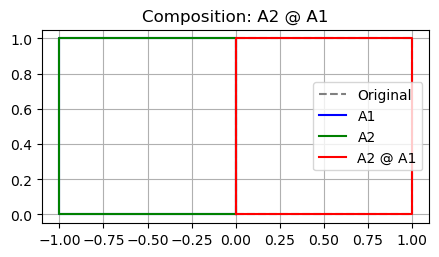

In [ ]:
plot_composition(A1, A2, "Composition: A₂ @ A₁ (Rotation then Reflection)")

In [ ]:
import numpy as np

# Define the matrices A1 and A2
A1 = np.array([[0, -1], [1, 0]])
A2 = np.array([[0, 1], [-1, 0]])

# Calculate the composed transformation matrix
A_total = A2 @ A1

print("Step-by-step matrix multiplication:")
print("A₂ @ A₁ = ")
print(f"{A2} @ {A1}")
print(f"     = {A_total}")
print()

# Verify what this combined transformation does
print("Effect of the composed transformation:")
print("• Original (1,0) →", A_total @ np.array([1, 0]))
print("• Original (0,1) →", A_total @ np.array([0, 1]))
print()

# Manual calculation to show the steps
print("Manual verification:")
print("(1,0) → A₁ → (0,1) → A₂ → (0,1)")  
print("(0,1) → A₁ → (-1,0) → A₂ → (1,0)")
print()

print("The composed transformation is equivalent to:")
print("A reflection across the line y = x!")

Composed matrix A2 @ A1:
[[0 1]
 [1 0]]


## 4. Why Order Matters: Non-Commutativity

Matrix multiplication is **not commutative**: $A_2 A_1 \neq A_1 A_2$ in general.

Let's see what happens when we reverse the order:

**Different Order**: $A_1 A_2$ means:
1. **First**: Apply $A_2$ (reflection)
2. **Second**: Apply $A_1$ (rotation)

**Geometric Intuition**:
- **$A_2 A_1$**: Rotate first, then reflect → different final position
- **$A_1 A_2$**: Reflect first, then rotate → different final position
- The intermediate step matters for the final result!

**Real-World Analogy**: 
- Put on socks, then shoes ≠ Put on shoes, then socks
- Turn left, then forward ≠ Go forward, then turn left

In [ ]:
alt_total = A1 @ A2

print("Comparison of different orders:")
print("=" * 40)
print("A₂ @ A₁ (rotate first, then reflect):")
print(A_total)
print()
print("A₁ @ A₂ (reflect first, then rotate):")
print(alt_total)
print()

print("Are they equal?", np.allclose(A_total, alt_total))
print()

# Show what each does to basis vectors
print("Effects on basis vectors:")
print("A₂ @ A₁:")
print("  e₁ = (1,0) →", A_total @ np.array([1, 0]))
print("  e₂ = (0,1) →", A_total @ np.array([0, 1]))
print()
print("A₁ @ A₂:")
print("  e₁ = (1,0) →", alt_total @ np.array([1, 0]))
print("  e₂ = (0,1) →", alt_total @ np.array([0, 1]))
print()

# Geometric interpretation
print("Geometric interpretation:")
print("• A₂ @ A₁: Reflection across line y = x")
print("• A₁ @ A₂: Reflection across line y = -x")
print("These are completely different transformations!")

Alternative order A1 @ A2:
[[ 0 -1]
 [-1  0]]

Are A2 @ A1 and A1 @ A2 equal? False


In [ ]:
# Visual comparison of both orders
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot A2 @ A1 (rotate first, then reflect)
square = np.array([[0, 1, 1, 0, 0], [0, 0, 1, 1, 0]])
A2A1_result = A_total @ square

ax1.plot(square[0], square[1], 'k--', linewidth=2, label='Original')
ax1.plot(A2A1_result[0], A2A1_result[1], 'r-', linewidth=3, label='A₂ @ A₁')
ax1.set_title('A₂ @ A₁: Rotate first, then reflect', fontsize=14, fontweight='bold')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot A1 @ A2 (reflect first, then rotate)
A1A2_result = alt_total @ square

ax2.plot(square[0], square[1], 'k--', linewidth=2, label='Original')
ax2.plot(A1A2_result[0], A1A2_result[1], 'b-', linewidth=3, label='A₁ @ A₂')
ax2.set_title('A₁ @ A₂: Reflect first, then rotate', fontsize=14, fontweight='bold')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Set same limits for comparison
for ax in [ax1, ax2]:
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

print("Visual proof that order matters!")
print("• Left plot: Different final position")
print("• Right plot: Different final position")
print("• Same transformations, different order → different results")

## ✅ Summary

| Concept                     | Explanation |
|----------------------------|-------------|
| Matrix Composition         | Combine effects of multiple transformations |
| Order matters              | A2 @ A1 ≠ A1 @ A2 in general |
| Associative                | Grouping doesn’t matter: (A3 @ A2) @ A1 = A3 @ (A2 @ A1) |

Matrix composition is the backbone of animation pipelines, neural nets, and equation solving in linear systems.

---

## ✅ Key Takeaways: Matrix Composition

| Concept | Mathematical Form | Meaning |
|---------|------------------|---------|
| **Composition** | $(A_2 A_1) \vec{v} = A_2(A_1 \vec{v})$ | Apply transformations sequentially |
| **Reading Order** | $A_2 A_1$ | Read right-to-left: $A_1$ first, then $A_2$ |
| **Non-Commutative** | $A_2 A_1 \neq A_1 A_2$ | Order matters! |
| **Associative** | $(A_3 A_2) A_1 = A_3 (A_2 A_1)$ | Grouping doesn't matter |
| **Determinant Property** | $\det(A_2 A_1) = \det(A_2) \cdot \det(A_1)$ | Areas multiply |

---

## 🌍 Real-World Applications

**Computer Graphics**: 
- 3D rotations around different axes
- Model-view-projection pipeline
- Animation keyframe interpolation

**Robotics**:
- Joint angle compositions
- End-effector positioning
- Path planning transformations

**Neural Networks**:
- Layer composition: $f_3(f_2(f_1(x)))$
- Weight matrix multiplication
- Forward propagation

**Linear Systems**:
- Gaussian elimination steps
- Change of basis transformations
- Solving $A\vec{x} = \vec{b}$ systems

---

## 🧠 Mental Model

Think of matrix composition as a **transformation assembly line**:
1. Each matrix is a "machine" that transforms shapes
2. Output of one machine becomes input to the next
3. Order of machines determines final result
4. You can't rearrange machines without changing the outcome

**Remember**: Matrix multiplication reads **right-to-left**, just like function composition!